<a href="https://colab.research.google.com/github/sethkipsangmutuba/Medical-Statistics/blob/main/a1.Sample_Size_and_Power_Considerations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample Size and Power Considerations

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Parameters
delta = 5       # Expected mean difference (mmHg)
sigma = 10      # Standard deviation (mmHg)
alpha = 0.05    # Significance level (two-sided)
n_current = 100 # Current sample size per group
desired_power = 0.8

# Function to calculate power
def calc_power(n, delta, sigma, alpha):
    SE = np.sqrt(sigma**2/n + sigma**2/n)
    Z_effect = delta / SE
    Z_alpha = norm.ppf(1 - alpha/2)
    Z_power = Z_effect - Z_alpha
    power = norm.cdf(Z_power)
    return power

# Sample sizes for plotting
sample_sizes = np.arange(20, 201, 1)
powers = [calc_power(n, delta, sigma, alpha) for n in sample_sizes]
powers

[np.float64(0.35240885330636085),
 np.float64(0.3670115533732654),
 np.float64(0.3814588380620357),
 np.float64(0.39574298702603866),
 np.float64(0.4098568692768829),
 np.float64(0.4237939355096186),
 np.float64(0.43754820601709843),
 np.float64(0.4511142554514322),
 np.float64(0.46448719536200644),
 np.float64(0.47766265520349827),
 np.float64(0.49063676233555414),
 np.float64(0.5034061214093708),
 np.float64(0.5159677934423318),
 np.float64(0.5283192748111482),
 np.float64(0.5404584763402992),
 np.float64(0.5523837026215095),
 np.float64(0.5640936316683145),
 np.float64(0.5755872949851188),
 np.float64(0.5868640581108603),
 np.float64(0.5979236016821743),
 np.float64(0.6087659030488964),
 np.float64(0.6193912184651073),
 np.float64(0.6298000658712358),
 np.float64(0.6399932082765234),
 np.float64(0.6499716377461586),
 np.float64(0.6597365599933374),
 np.float64(0.6692893795732384),
 np.float64(0.678631685673233),
 np.float64(0.6877652384915074),
 np.float64(0.6966919561945372),
 np.f

In [18]:
# Calculate required sample size for desired power
Z_alpha = norm.ppf(1 - alpha/2)
Z_desired = norm.ppf(desired_power)
n_required = 2 * sigma**2 * (Z_alpha + Z_desired)**2 / delta**2

In [19]:
Z_alpha

np.float64(1.959963984540054)

`np.float64(1.959963984540054)` → Critical **Z-value ≈ 1.96**, used for **95% confidence intervals** and **two-sided tests at α = 0.05**.


In [20]:
Z_desired

np.float64(0.8416212335729143)

`np.float64(0.8416212335729143)` → Critical **Z-value ≈ 0.84**, corresponding to **80% statistical power (1−β = 0.80)**.


In [21]:
n_required

np.float64(62.79103787479271)

`np.float64(62.79103787479271)` → Required **sample size ≈ 63 per group** to achieve **80% power** at α = 0.05.


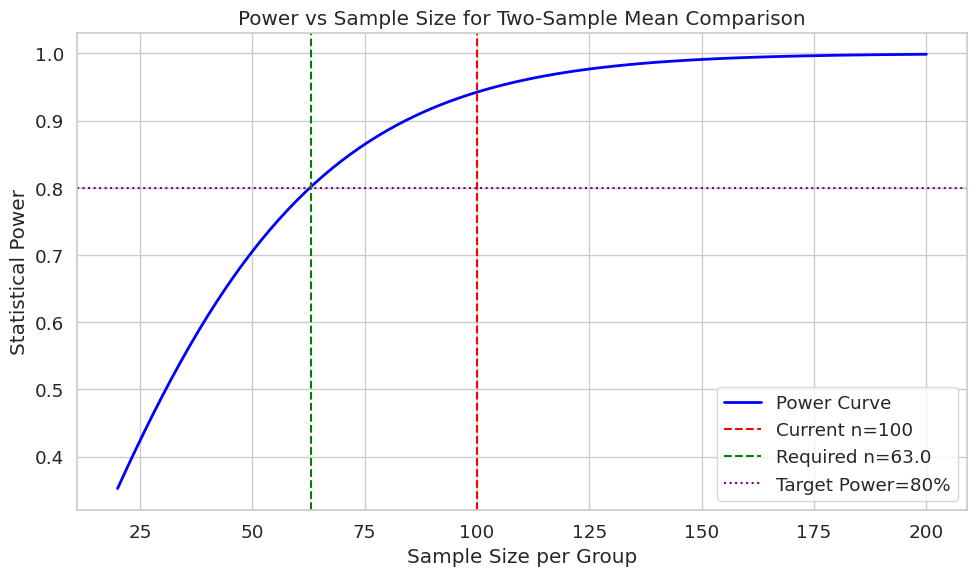

In [22]:
# Plotting
plt.figure(figsize=(10,6))
plt.plot(sample_sizes, powers, label='Power Curve', color='blue', linewidth=2)
plt.axvline(n_current, color='red', linestyle='--', label=f'Current n={n_current}')
plt.axvline(np.ceil(n_required), color='green', linestyle='--', label=f'Required n={np.ceil(n_required)}')
plt.axhline(desired_power, color='purple', linestyle=':', label=f'Target Power={desired_power*100:.0f}%')
plt.xlabel('Sample Size per Group')
plt.ylabel('Statistical Power')
plt.title('Power vs Sample Size for Two-Sample Mean Comparison')
plt.legend()
plt.tight_layout()
plt.show()
